# Newyork room rentals ads EDA Analysis 🏠
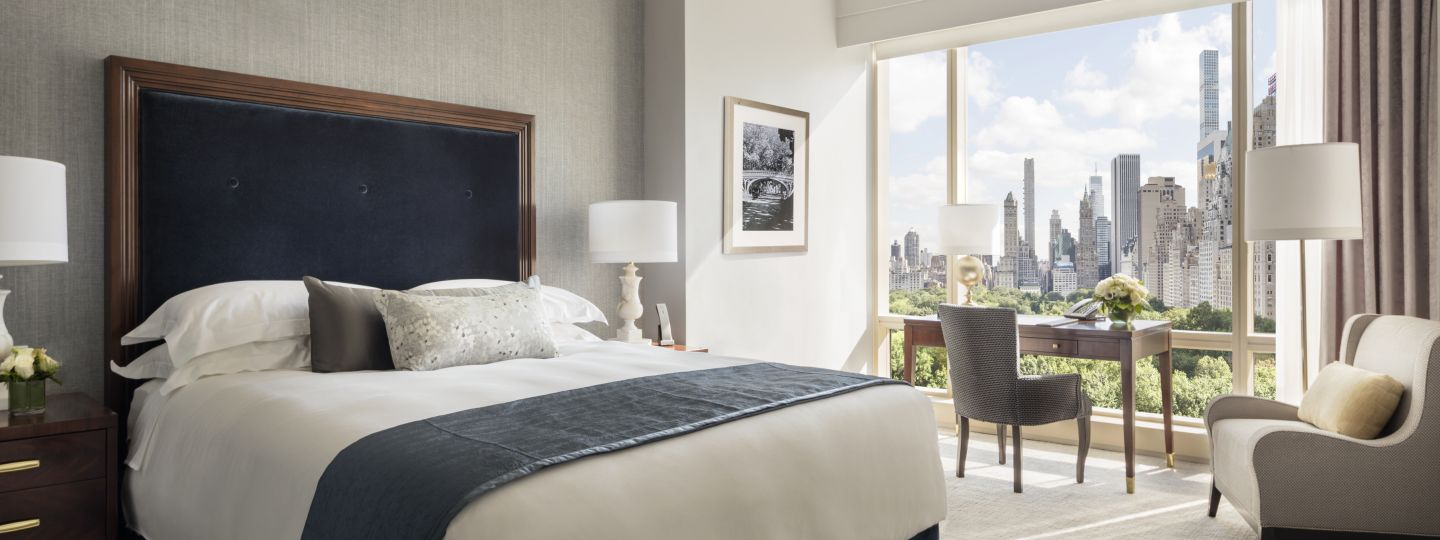

# 1. Introduction ⬇
**This notebook is our attempt to visualize vagueness of Room rental ads in Newyork.**

# 2. Importing required libraries 📚

In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# 3. Reading CSV Data 📝

In [ ]:
df = pd.read_csv("../input/newyork-room-rentalads/room-rental-ads.csv")
df.head()

In [ ]:
df.info()

In [ ]:
df.shape

# 4. Data Pre-processing ⚙️

In [ ]:
df.rename(columns={'Description': 'desc', 'Vague/Not': 'vague'},inplace=True)
df

In [ ]:
df.count()

In [ ]:
print(df.isna().sum())

In [ ]:
df.dropna(how = "any", inplace=True)

In [ ]:
df.count()

# 5. Data Visualization 📉
**5.1. Classifying Vague and Non vague ads.**

In [ ]:
classification = df.groupby('vague').count()
classification

In [ ]:
count = list(df['vague'].value_counts())
count

In [ ]:
x=['vague','Not vague']
y = count
fig = plt.figure(figsize = (10, 5)) 
  
plt.bar(x, y, color ='orange',  
        width = 0.5) 
  
plt.xlabel("Vague/Not") 
plt.ylabel("No. of ads in data") 
plt.xticks(rotation=90)
plt.title("No.of ads in each group") 
plt.show() 

**5.2. Analysis of Content length of ads**

In [ ]:
def find_message_length(content):
    return len(content)

In [ ]:
df['content_len'] = df['desc'].apply(find_message_length)
df

In [ ]:
plt.hist(df['content_len'],bins = 50, weights = np.ones(len(df['content_len']))/len(df['content_len']))
plt.xlabel("Content length")
plt.ylabel("Group count")
plt.title("Analysis of content length")
plt.show()

In [ ]:
vague = df[df['vague']==1].iloc[: ,0]
not_vague= df[df['vague']==0].iloc[: ,0]
plt.hist(vague.apply(lambda desc: len(desc)),bins = 50,label = 'Vague', alpha=0.5)
plt.hist(not_vague.apply(lambda desc: len(desc)),bins=50,label='Not Vague',alpha=0.5)
plt.xlabel("Content length")
plt.ylabel("Group count")
plt.title("Analysis of content length")
plt.legend()
plt.show()

**5.3. Analysis of Frequent words in ads**

In [ ]:
import string
string.punctuation

def remove_punctuation(text):
    new_text=''.join([char for char in text if char not in string.punctuation])
    return new_text
df['new_desc']=df['desc'].apply(lambda row : remove_punctuation(row))
df

In [ ]:
import re
def tokenize(text):
    tokens=re.split('\W+',text)
    return tokens

In [ ]:
df['tokenized_text']=df['new_desc'].apply(lambda row : tokenize(row.lower()))
df.head()

In [ ]:
import nltk
stopwords=nltk.corpus.stopwords.words('english')
stopwords[:5]

In [ ]:
def remove_stopwords(text):
    clean_text=[word for word in text if word not in stopwords]
    return clean_text

In [ ]:
df['clean_text'] = df['tokenized_text'].apply(lambda row : remove_stopwords(row))
df.head()

In [ ]:
from collections import Counter
words_collection = Counter([item for subtext in df['clean_text'] for item in subtext])
freq_word_df = pd.DataFrame(words_collection.most_common(20))
freq_word_df.columns = ['frequently_used_word','count']

In [ ]:
freq_word_df

In [ ]:
import plotly.graph_objects as go

labels = list(freq_word_df['frequently_used_word'])
values = list(freq_word_df['count'])

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

**5.4. Analysis of Frequent words in both Vague and Non vague ads**

In [ ]:
vague_content = df[df['vague']==1]
not_vague_content= df[df['vague']==0]
words_collection_in_vague = Counter([item for subtext in vague_content['clean_text'] for item in subtext])
words_collection_in_notvague = Counter([item for subtext in not_vague_content['clean_text'] for item in subtext])
freq_word_df_vague = pd.DataFrame(words_collection_in_vague.most_common(20))
freq_word_df_notvague = pd.DataFrame(words_collection_in_notvague.most_common(20))
freq_word_df_vague.columns = ['frequently_used_word','count']
freq_word_df_notvague.columns = ['frequently_used_word','count']

In [ ]:
freq_word_df_vague

In [ ]:
#vague freq words count
labels = list(freq_word_df_vague['frequently_used_word'])
values = list(freq_word_df_vague['count'])

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

In [ ]:
freq_word_df_notvague

In [ ]:
#nonvague freq words count
labels = list(freq_word_df_notvague['frequently_used_word'])
values = list(freq_word_df_notvague['count'])

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()